In [1]:
import pandas as pd
import numpy as np
import os
import datetime as datetime
import matplotlib.pyplot as plt

# Parameters

In [2]:
PATH_ROOT_DATA = 'C:\\Users\\c.lopez.de.munain\Documents\\covid_19'
INPUT_DATA_NAME = 'COVID-19-geographic-disbtribution-worldwide-2020-03-14_1.xls'

# Import Data

In [3]:
covid19_data = pd.read_excel(os.path.join(PATH_ROOT_DATA,INPUT_DATA_NAME))

In [4]:
covid19_data.head()

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA
1,2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2,2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA
3,2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA
4,2020-02-29,Afghanistan,0,0,AF,NaN,Non-EU/EEA


In [5]:
covid19_data.dtypes

DateRep         datetime64[ns]
CountryExp              object
NewConfCases             int64
NewDeaths                int64
GeoId                   object
Gaul1Nuts1              object
EU                      object
dtype: object

In [6]:
covid19_data.shape

(5001, 7)

In [7]:
# Checking for nulls
covid19_data.isnull().sum()

DateRep            0
CountryExp         0
NewConfCases       0
NewDeaths          0
GeoId              0
Gaul1Nuts1      4509
EU                 0
dtype: int64

In [8]:
# Don't know what this feature is so it doesn't matter for now
covid19_data[~covid19_data.Gaul1Nuts1.isnull()].head()

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
887,2020-03-10,Cases on an international conveyance Japan,-9,1,JPG11668,JPG11668,0
888,2020-03-02,Cases on an international conveyance Japan,0,0,JPG11668,JPG11668,0
889,2020-03-01,Cases on an international conveyance Japan,0,0,JPG11668,JPG11668,0
890,2020-02-29,Cases on an international conveyance Japan,0,2,JPG11668,JPG11668,0
891,2020-02-28,Cases on an international conveyance Japan,0,0,JPG11668,JPG11668,0


## Prepare Data

In [9]:
# Set datetime index
covid19_data.set_index('DateRep', inplace=True)

In [10]:
covid19_data.head()

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
DateRep,,,,,,
2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA
2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA
2020-02-29,Afghanistan,0,0,AF,NaN,Non-EU/EEA


In [11]:
covid19_data.sort_index(inplace=True)

In [12]:
groupcols = ['CountryExp']

In [13]:
covid19_data['NewConfCases_cum'] = covid19_data.groupby(groupcols)['NewConfCases'].cumsum()
covid19_data['NewDeaths_cum'] = covid19_data.groupby(groupcols)['NewDeaths'].cumsum()

In [14]:
covid19_data.CountryExp.unique()[:2]

array(['Vietnam', 'Sri Lanka'], dtype=object)

In [15]:
covid19_data[covid19_data['CountryExp'].isin(['Afghanistan', 'Albania'])].tail(10)

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,
2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA,1,0
2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA,1,0
2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA,4,0
2020-03-09,Albania,2,0,AL,NaN,EU Candidate,2,0
2020-03-10,Albania,4,0,AL,NaN,EU Candidate,6,0
2020-03-11,Albania,4,0,AL,NaN,EU Candidate,10,0
2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA,7,0
2020-03-12,Albania,1,1,AL,NaN,EU Candidate,11,1
2020-03-13,Albania,12,0,AL,NaN,EU Candidate,23,1


# Plot exploration

### Plot cases confirmed by date

In [16]:
covid19_data_bydate = covid19_data.groupby(covid19_data.index)['NewConfCases'].sum()

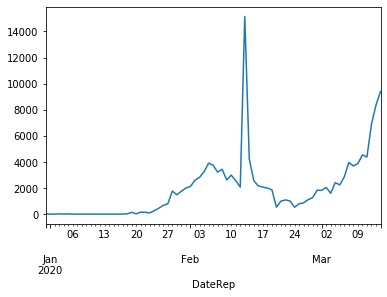

In [17]:
covid19_data_bydate.plot()

In [19]:
covid19_data[covid19_data['NewConfCases'] >= 12000]

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,
2020-02-13,China,15141,254,CN,NaN,Non-EU/EEA,59865,1368


In [20]:
covid19_data[covid19_data.index == '2020-02-13'].sort_values('NewConfCases', ascending=False).head()

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,
2020-02-13,China,15141,254,CN,NaN,Non-EU/EEA,59865,1368
2020-02-13,Japan,4,1,JP,NaN,Non-EU/EEA,29,1
2020-02-13,Singapore,3,0,SG,NaN,Non-EU/EEA,50,0
2020-02-13,Vietnam,1,0,VN,NaN,Non-EU/EEA,16,0
2020-02-13,United States of America,1,0,US,NaN,Non-EU/EEA,14,0


In [21]:
# Because China has a different scale I'm separating it
covid19_data_china = covid19_data[covid19_data['CountryExp'] == 'China']
covid19_data_nonchina = covid19_data[covid19_data['CountryExp'] != 'China']

#### China 

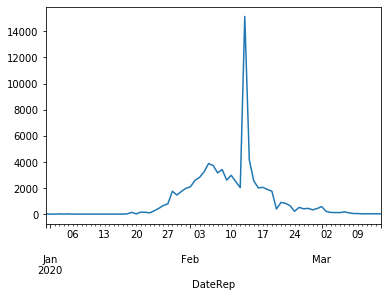

In [22]:
covid19_data_bydate_china = covid19_data_china.groupby(covid19_data_china.index)['NewConfCases'].sum()
covid19_data_bydate_china.plot()

#### Non China

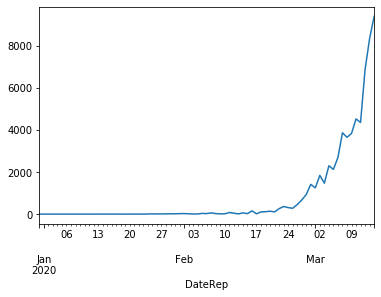

In [23]:
covid19_data_bydate_nonchina = covid19_data_nonchina.groupby(covid19_data_nonchina.index)['NewConfCases'].sum()
covid19_data_bydate_nonchina.plot()

#### Countries worst infected

In [24]:
covid19_data_nonchina.groupby(['CountryExp'])['NewConfCases'].sum().sort_values(ascending=False).head(10)

CountryExp
Italy                       17660
Iran                        11364
South Korea                  8086
Spain                        4231
France                       3661
Germany                      3062
United States of America     2174
Switzerland                   854
Denmark                       804
Netherlands                   804
Name: NewConfCases, dtype: int64

##### Italy

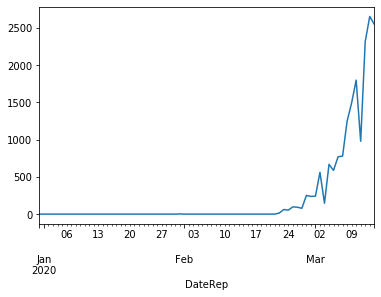

In [25]:
country_filter = 'Italy'
covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].groupby(covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].index)['NewConfCases'].sum().plot()

##### Iran

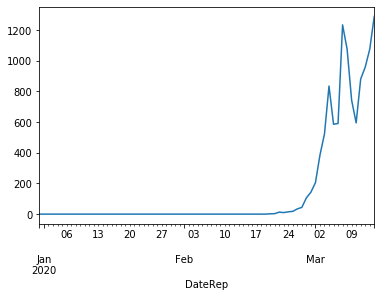

In [26]:
country_filter = 'Iran'
covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].groupby(covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].index)['NewConfCases'].sum().plot()

##### South Korea

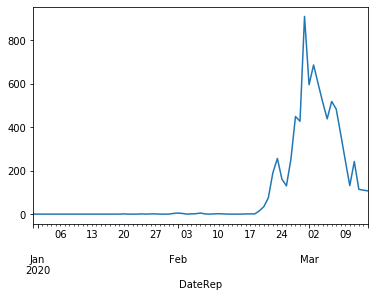

In [27]:
country_filter = 'South Korea'
covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].groupby(covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].index)['NewConfCases'].sum().plot()

Approx at 200 cases contagion seems to get out of control

## Contagion trend evolution analysis

### Plot cumulative features

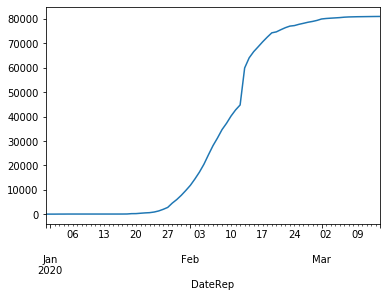

In [28]:
country_filter = 'China'
covid19_data[covid19_data['CountryExp'] == country_filter]['NewConfCases_cum'].plot()

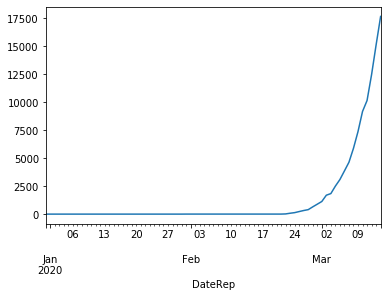

In [29]:
country_filter = 'Italy'
covid19_data[covid19_data['CountryExp'] == country_filter]['NewConfCases_cum'].plot()

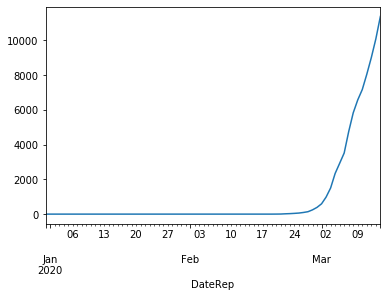

In [30]:
country_filter = 'Iran'
covid19_data[covid19_data['CountryExp'] == country_filter]['NewConfCases_cum'].plot()

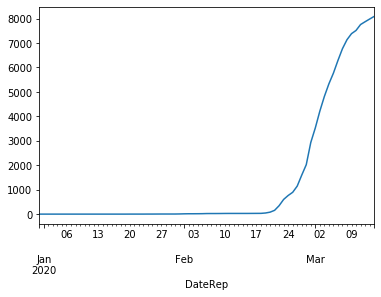

In [31]:
country_filter = 'South Korea'
covid19_data[covid19_data['CountryExp'] == country_filter]['NewConfCases_cum'].plot()